### Import Libraries

In [1]:
import pandas as pd

## keras inports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## preprocessing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
## Load Dataset
df=pd.read_csv("metadata.csv")
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [3]:
## Shape of the data
df.shape

(7565, 10)

## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [5]:
df = df.drop(['start_time','battery_id','test_id','uid','filename'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


In [7]:
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN


In [8]:
df.isnull().sum()

type                      0
ambient_temperature       0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64

In [9]:
## Convert 'Re', 'Rct' and 'Capacity' to numeric, invalid parsin will be set to Nan
df['Re'] = pd.to_numeric(df['Re'],errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'],errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'],errors='coerce')

In [10]:
## Filling the missing values with their respective mean

df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)

In [11]:
df.isnull().sum()

type                   0
ambient_temperature    0
Capacity               0
Re                     0
Rct                    0
dtype: int64

## Encoding

In [12]:
df['type'].value_counts()

type
charge       2815
discharge    2794
impedance    1956
Name: count, dtype: int64

In [13]:
label_encoder = LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])

In [14]:
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12


## Train Test Split

In [15]:
## Features (X) - All coumns except 'ambient_temperature'
X = df.drop(columns =['ambient_temperature'])

## Target (y) - 'ambient_temperature' columns
y = df['ambient_temperature']

In [16]:
## Shape of X & y
X.shape, y.shape

((7565, 4), (7565,))

In [17]:
## split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
## Display the shape of the split data
print(f'Shape of training data: {X_train.shape}')
print(f'Shape of testing data: {X_test.shape}')

Shape of training data: (6052, 4)
Shape of testing data: (1513, 4)


## Scaling

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data and transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(f" Scaled X_train data {X_train_scaled[0:5]}")

 Scaled X_train data [[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


## Model Building

In [20]:
model = Sequential()

## Input layer and First hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))

## Dropout layer
model.add(Dropout(0.2))

## Second hidden layer
model.add(Dense(64, activation='relu'))

## Dropout layer
model.add(Dropout(0.2))


## Second hidden layer
model.add(Dense(32, activation='relu'))

## Dropout layer
model.add(Dropout(0.2))

## Output layer
model.add(Dense(1, activation='linear'))

## Complile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to monitor
    patience=10,            # Number of epochs with no improvement
    mode='min',            # For loss, we want to minimize
    restore_best_weights=True,  # Restore weights from best epoch
    verbose=1
    )

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=100, callbacks=[early_stopping], batch_size=32, validation_data=(X_test_scaled,y_test))

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 314.1775 - mae: 14.4097 - val_loss: 110250.4766 - val_mae: 16.2484
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 113.4158 - mae: 8.3973 - val_loss: 89215.0078 - val_mae: 15.1835
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 113.4049 - mae: 8.2399 - val_loss: 72257.3203 - val_mae: 13.7746
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 106.5797 - mae: 7.8502 - val_loss: 45938.8750 - val_mae: 12.4971
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 100.8896 - mae: 7.7444 - val_loss: 43212.6836 - val_mae: 12.1935
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 96.3649 - mae: 7.4957 - val_loss: 53853.5312 - val_mae: 12.5012
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 95.5960 - mae: 7.5254 - val_loss: 39676.9453 - val_mae: 11.8087
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 96.8760 - mae: 7.5164 - val_loss: 32037.3

# Model Evaluation

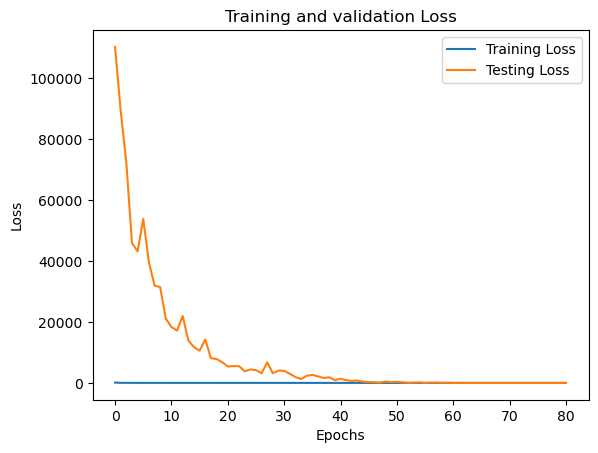

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation Loss")
plt.show()

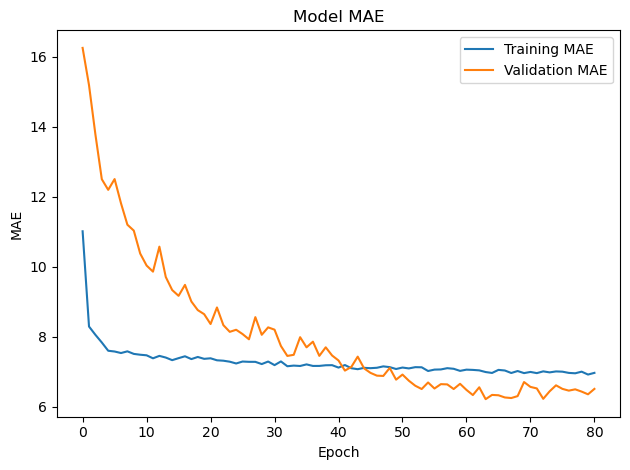

In [24]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f'Test Loss (MSE): {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 90.3148 - mae: 6.8604 
Test Loss (MSE): 84.5544
Test MAE: 6.5648


# Prediction System

In [30]:
import numpy as np
def predict_battery_life(type_discharge, Capacity, Rec, Rct, label_encoder, scaler, model):
    
    # Encode categorical variable
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]

    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded, Capacity, Re, Rct]])

    # Scale the input feature using the same scaler
    X_input_scaled = scaler.transform(X_input)

    # Predict battery life (Ambient Temperature)
    predicted_battery_life = model.predict(X_input_scaled)
    return predicted_battery_life[0]

In [33]:
## Example usage of the function
type_discharge = 'impedance'
Capacity = 1.674305
Re = -4.97600e+11
Rct = 1.055903e+12

# Call the prediction function
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)
print(f"Predicted Battery life: {predicted_battery_life}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Battery life: [28.572794]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Save Files

In [34]:
import pickle

# Save the model scaler and label_encoder to disk

with open('batter_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [35]:
model.save("battery_life_model.h5")